In [1]:
import pandas as pd

In [2]:
import os
import time

import numpy as np
import pandas as pd
import nltk

import re
nltk.download('punkt') # one time execution
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
test_df = pd.read_csv(r"johnmccoy/testdf_all.csv")
test_df.drop(columns = ['Unnamed: 0'], inplace = True)
#test_df['content_en'] = test_df['content_en'].str.lower()
print(test_df.shape)
test_df.sample(n=10)

(270, 6)


,Date retrieved,id,content,content_en,category,subject
0,2021-03-24,https://www.idealista.pt/en/news/property-sale...,"Everyone loves a bargain, especially when it c...","Everyone loves a bargain, especially when it c...",Development,Real Estate
205,2021-03-22,https://blog.portadafrente.com/lisboa-melhor-d...,"\nRelativamente acessível, com uma história fa...","Relatively accessible, with a fascinating hist...",See & Do,lifestyle
172,2021-03-22,https://blog.portadafrente.com/artes-lisboa-le...,"\nO Consulado do Brasil, situado na Praça Luís...","The Consulate of Brazil, located in Luís de Ca...",See & Do,lifestyle
212,2021-03-22,https://blog.portadafrente.com/reducao-da-taxa...,\nO concelho de Oeiras tem vindo a crescer no ...,The municipality of Oeiras has been growing in...,Development,lifestyle
6,2021-03-24,https://www.idealista.pt/en/news/property-for-...,What factors affect the selling price of a hom...,What factors affect the selling price of a hom...,Development,Real Estate
73,2021-03-26,https://www.timeout.pt/lisboa/pt/viagens/estra...,Desde sempre que o cinema nos empurrou o imagi...,Since whenever cinema has pushed us the imagin...,See and Do,lifestyle
23,2021-03-26,https://www.timeout.pt/lisboa/pt/atraccoes/mon...,Cidadãos de todo o planeta têm-se insurgido co...,Citizens of all the planet have been insurgid ...,See and Do,lifestyle
254,2021-03-27,https://www.expatica.com/pt/moving/visas/portu...,Relatives and partners can apply for a family ...,Relatives and partners can apply for a family ...,process,Real Estate
146,2021-03-22,https://blog.portadafrente.com/porta-da-frente...,\nA Porta da Frente Christie’s associou-se à C...,The Christie's front door associated with the ...,Christies,lifestyle
92,2021-03-22,https://blog.portadafrente.com/scenic-novo-pro...,A Porta da Frente|Christie´s inicia hoje a fas...,The front door | Christie's today starts the m...,Development,lifestyle


In [7]:
test_df = test_df[test_df["category"] == "Live and Work"]
test_df.sample(n=2)
#this selects all articles from the category process and returns the most relevant sentences using cosine similarity of word embeddings

,Date retrieved,id,content,content_en,category,subject
265,2021-03-27,https://www.expatica.com/pt/living/household/c...,"A guide on how to call Portugal, Portugal’s co...","A guide on how to call Portugal, Portugal’s co...",Live and Work,lifestyle
264,2021-03-27,https://www.expatica.com/pt/living/household/s...,Get signed up to Portugal TV with this guide t...,Get signed up to Portugal TV with this guide t...,Live and Work,lifestyle


In [8]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in test_df['content_en']:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list

In [9]:
import numpy as np
# Extract word vectors
word_embeddings = {}
f = open(r'data\glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [10]:
len(word_embeddings)

400000

In [11]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

C:\Users\bla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [12]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [13]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [14]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [15]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [17]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [18]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [19]:
# Extract top 5 sentences as the summary
relevant = ""
for i in range(5):
    #print(ranked_sentences[i][1])
    relevant += (ranked_sentences[i][1]) + " "
print(relevant)

It can pay to thoroughly research the best deal for you, especially as you’ll need to subscribe to the service on a minimum term contract.If your contract runs out and you’d like to cancel, make sure you give one month’s notice to your provider, usually in writing.Although getting the internet in Portugal is often a necessity, you might consider opening a bank account in Portugal first; without one, you may find some deals have higher fees. The following are all places where you can apply for a Portuguese NIF number:local tax office of the Portuguese tax authorityat a local branch of a Citizen Shopat a counter that provides the Citizen CardApplying for a NIF number is also possible without being physically present if you aren’t already living in Portugal. These are fairly expensive, however, and are only as good as the signal in the area you’re attempting to use them.Many people also use mobile broadband in Portugal, which can be useful when you just move to Portugal and have not made 

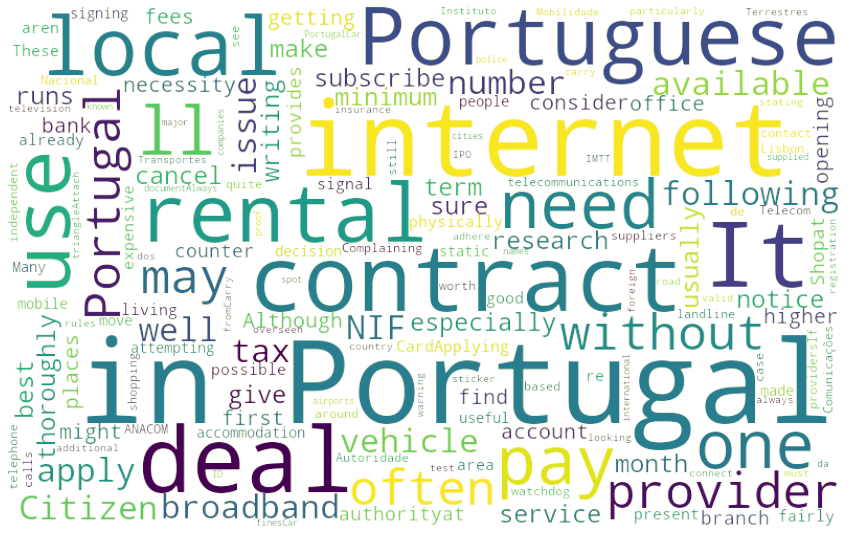

In [21]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="rgba(240, 235, 155, 0)", mode="RGBA").generate(relevant)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig(r'johnmccoy\relevant.png') 
plt.show()

In [ ]:
#!pip install ktrain